<a href="https://colab.research.google.com/github/martuscellifaria/Coursera/blob/main/Decision_Tree_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Decision Tree Assignment - Adolescents Health
This is part of the Coursera Machine Learning for Data Analysis course. Analogously to the decision tree example regarding smoking dependence, the objective is to obtain a decision tree to investigate many factors influence on adolescents health.

##1. Library declaration
First things first, right? Pandas and Sklearn are mandatory for things to work out, so let's write it down.

In [1]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics

#2. Read the csv file
Since the framework used is Google Colab, some work is needed to refer to the .csv file.

In [3]:
AH_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Course ML/addhealth_pds.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8,11,22,65,134,135,177,205,206,207,208,346,366,523,532,533,753,755,756,842,843,847,848,849,856,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,966,967,974,979,980,982,986,987,989,991,992,994,1010,1035,1036,1037,1038,1039,1040,1041,1042,1043,1044,1045,1046,1047,1048,1049,1050,1051,1052,1053,1073,1075,1078,1079,1080,1081,1084,1085,1086,1087,1088,1091,1092,1093,1094,1095,1097,1098,1099,1119,1141,1142,1143,1144,1145,1146,1147,1148,1149,1150,1151,1152,1153,1154,1155,1156,1157,1158,1159,1160,1161,1162,1163,1164,1184,1185,1186,1187,1190,1191,1192,1193,1194,1197,1198,1199,1200,1201,1219,1221,1222,1235,1236,1237,1238,1239,1240,1262,1263,1264,1265,1266,1267,1268,1269,1270,1271,1272,1273,1274,1275,1276,12

# 3. Clean the data

In [4]:
data_clean = AH_data.dropna()
data_clean.dtypes
data_clean.describe()

,AID,IMONTH,IDAY,IYEAR,SCID,SSCID,COMMID,MACNO,SCH_YR,BIO_SEX,H1GI1M,H1GI1Y,H1GI2,H1GI4,H1GI5A,H1GI5B,H1GI5C,H1GI5D,H1GI5E,H1GI5F,H1GI6A,H1GI6B,H1GI6C,H1GI6D,H1GI6E,H1GI7A,H1GI7B,H1GI7C,H1GI7D,H1GI7E,H1GI7F,H1GI7G,H1GI8,H1GI9,H1GI10,H1GI11,H1GI12,H1GI13M,H1GI13Y,H1GI14,...,H1WS2F,H1WS3F,H1WS4F,H1WS5F,H1WS6F,H1WS7F,H1WS8F,H1WS9F,H1WS10F,H1WS11F,H1WS12F,STUDSIBG,TWING,H1WS1G,H1WS2G,H1WS3G,H1WS4G,H1WS5G,H1WS6G,H1WS7G,H1WS8G,H1WS9G,H1WS10G,H1WS11G,H1WS12G,H1WS13,SMP01,SMP11,SMP06,SMP04,SMP03,SMP02,SMP05,SMP09,SMP10,SMP12,SMP07,SMP08,CLUSTER1,CLUSTER2
count,6.504000e+03,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,...,6504.0,6504.0,6504.0,6504.0,6504.0,6504.0,6504.0,6504.0,6504.0,6504.0,6504.0,6504.0,6504.0,6504.0,6504.0,6504.0,6504.0,6504.0,6504.0,6504.0,6504.0,6504.0,6504.0,6504.0,6504.0,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000
mean,9.417178e+07,6.577645,15.735855,94.999846,84.143143,105.683733,441.332565,100227.341328,0.354397,1.516759,6.604090,78.970941,0.542589,0.141605,6.271525,6.214022,6.214637,6.222940,6.222325,6.221095,0.682349,0.271064,0.058426,0.063653,0.087485,6.719711,6.726015,6.715713,6.712485,6.716328,6.713715,6.717405,6.766144,1.565959,1.094557,2.136224,946.006458,92.111777,96.373924,6.584102,...,7.0,7.0,7.0,97.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,97.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,1.038130,0.933579,0.016759,0.003229,0.001076,0.079951,0.006150,0.003998,0.010148,0.003229,0.003998,0.024600,0.036439,441.332565,185.143143
std,6.550036e+06,1.403560,8.708040,0.012400,68.233921,71.703814,22.289236,130.220525,0.483165,0.502825,3.905455,1.809704,0.575287,0.554653,2.047885,2.203267,2.201672,2.179996,2.181610,2.184834,0.603661,0.587574,0.450161,0.455230,0.476936,1.352976,1.323661,1.371227,1.385784,1.368436,1.380258,1.363537,1.086544,1.032436,0.380771,2.440978,203.542871,20.483431,2.803817,1.635471,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.706785,0.249035,0.128377,0.056735,0.032791,0.271238,0.078187,0.063104,0.100231,0.056735,0.063104,0.154915,0.187395,22.289236,68.233921
min,5.710027e+07,1.000000,1.000000,94.000000,1.000000,1.000000,401.000000,100001.000000,0.000000,1.000000,1.000000,74.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,30.000000,1.000000,77.000000,0.000000,...,7.0,7.0,7.0,97.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,97.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,401.000000,102.000000
25%,9.257287e+07,5.000000,8.000000,95.000000,33.000000,44.000000,421.000000,100110.000000,0.000000,1.000000,4.000000,78.000000,0.000000,0.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,1.000000,1.000000,1.000000,997.000000,97.000000,97.000000,7.000000,...,7.0,7.0,7.0,97.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,97.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,421.000000,134.000000
50%,9.471444e+07,6.000000,15.000000,95.000000,67.000000,94.000000,442.000000,100225.000000,0.000000,2

#4. Split the data in training and test and assign predictors and targets

In [12]:
predictors = data_clean[['IMONTH','IDAY','BIO_SEX','MACNO','SCH_YR','SCID',
'SSCID','COMMID']]


targets = data_clean.SMP02

pred_train, pred_test, tar_train, tar_test  =   train_test_split(predictors, targets, test_size=.4)

pred_train.shape
pred_test.shape
tar_train.shape
tar_test.shape

(2602,)

#5. Fitting decision tree classification to the training and test set

In [13]:
classifier=DecisionTreeClassifier()
classifier=classifier.fit(pred_train,tar_train)

predictions=classifier.predict(pred_test)

sklearn.metrics.confusion_matrix(tar_test,predictions)
sklearn.metrics.accuracy_score(tar_test, predictions)

0.9888547271329746

#6. Plotting the decision tree
With an accuracy of near 99%, the decision tree has proven to be a great model to classify the results for the analysed sample. The tree follows:

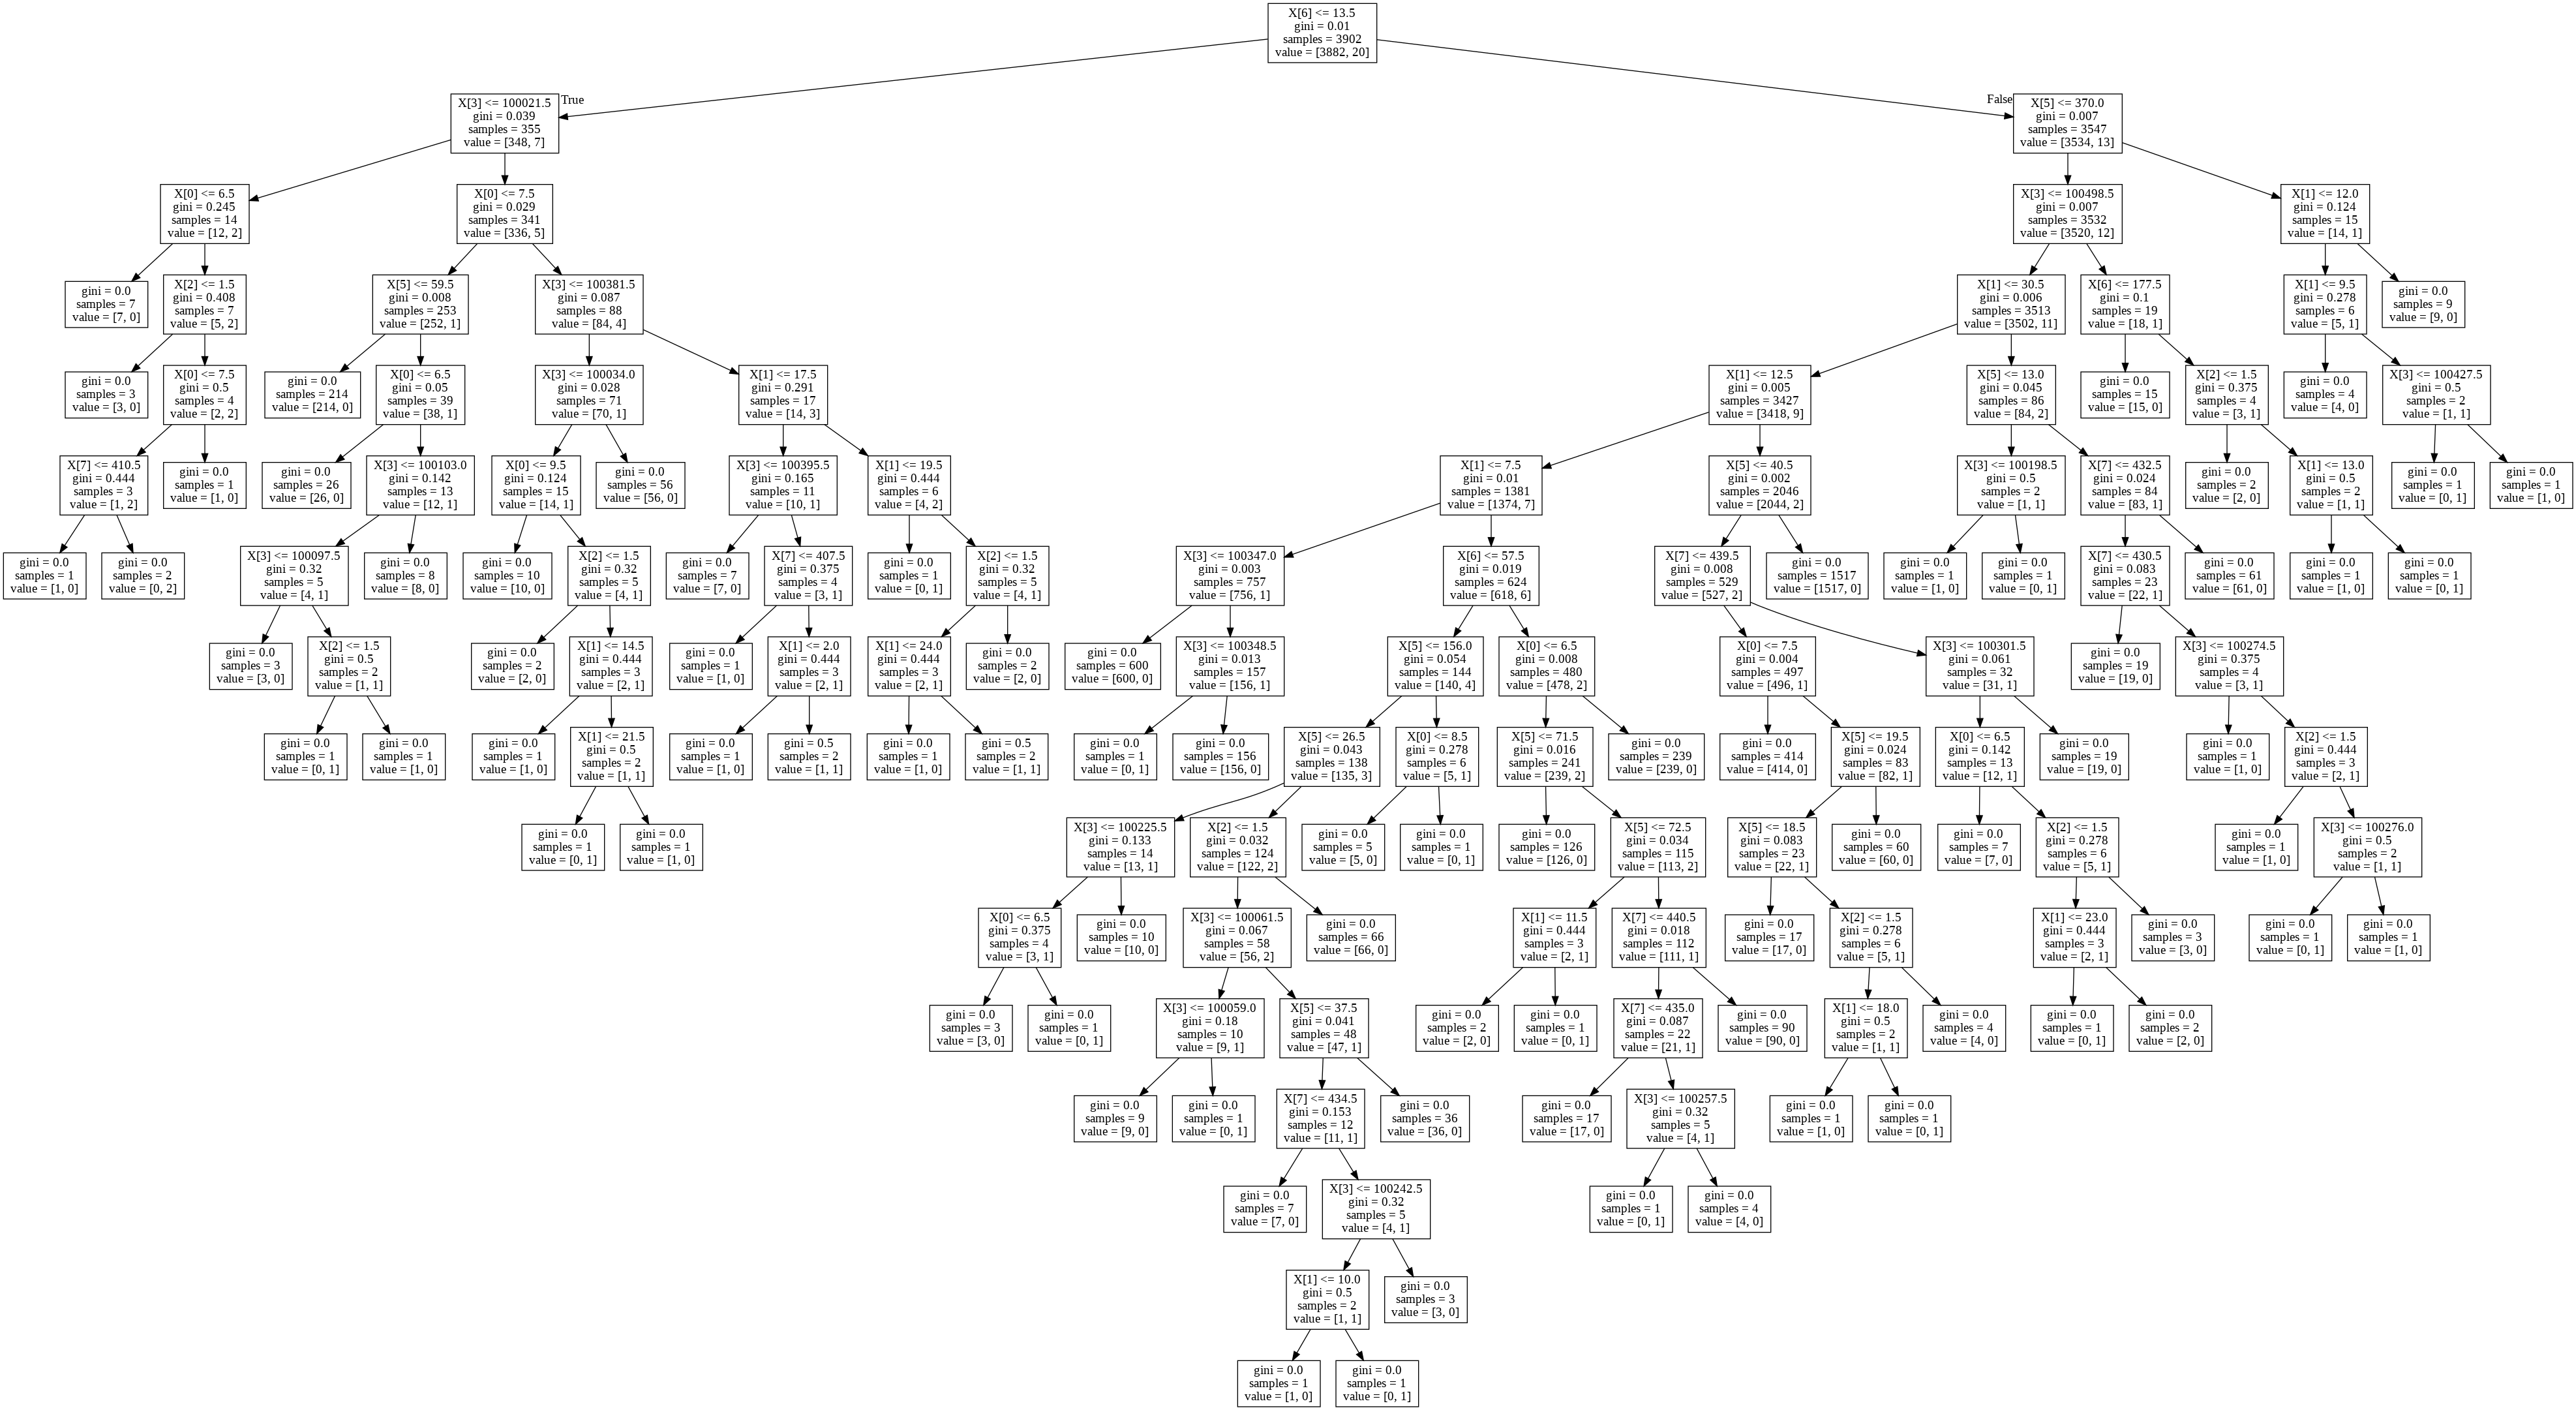

In [14]:
from sklearn import tree
#from StringIO import StringIO
from io import StringIO
#from StringIO import StringIO 
from IPython.display import Image
out = StringIO()
tree.export_graphviz(classifier, out_file=out)
import pydotplus
graph=pydotplus.graph_from_dot_data(out.getvalue())
Image(graph.create_png())